In [ ]:
import pandas as pd

df = pd.read_csv('data/11_final_data_update2.csv')
print(df.head())

    repo_id repo_owner repo_name  project_age  project_size  \
0  17165658     apache     spark    11.054795        489668   
1   4710920     apache     dubbo    12.742466         59474   
2   9185792     apache   echarts    11.953425        245347   
3  33884891     apache   airflow     9.923288        333074   
4  39464018     apache  superset     9.652055        704890   

   total_forks_count                                  annual_forks_list  \
0              25828  [3075, 3600, 3522, 3230, 3187, 2622, 2081, 180...   
1              23141  [1200, 2147, 3446, 3903, 4134, 2965, 1951, 141...   
2              18237  [1418, 1558, 1605, 2196, 3118, 3731, 2260, 123...   
3              14286  [212, 565, 814, 1329, 1812, 1879, 2120, 1992, ...   
4              13813  [15, 899, 1277, 1228, 1300, 1052, 1788, 1638, ...   

   avg_annual_forks_growth_rate  contributed_back_forks_count  \
0                     -0.092254                          1850   
1                      0.018390         

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [47]:
from datetime import time
"""
Data Processing
"""

# Deal with empty data

# """
# Option 1: Drop rows with 'Not Apply'
# """
# df = df[df.apply(lambda row: 'Not Apply' not in row.astype(str).values, axis=1)]
# print(f"Row count after dropping 'Not Apply': {len(df)}")


"""
Option 2: Replace with other values
"""
# # Replace 'Not Apply' with 0.0 in 'ratio_of_compatibility_issues'
# df['ratio_of_compatibility_issues'] = df['ratio_of_compatibility_issues'].replace('Not Apply', 0.0)

# # Replace 'Not Apply' with the mean in 'time_taken_to_merge'
# df_filtered = df[df['time_taken_to_merge'] != 'Not Apply']
# df_filtered['time_taken_to_merge'] = pd.to_numeric(df_filtered['time_taken_to_merge'], errors='coerce')
# mean_time_taken_to_merge = df_filtered['time_taken_to_merge'].mean()
# df['time_taken_to_merge'] = df['time_taken_to_merge'].replace('Not Apply', mean_time_taken_to_merge)

# Convert 'ratio_of_compatibility_issues' to numeric, filling NaN with 0.0
df['ratio_of_compatibility_issues'] = pd.to_numeric(df['ratio_of_compatibility_issues'], errors='coerce').fillna(0.0)

# Convert 'time_taken_to_merge' to numeric, forcing errors to NaN
df['time_taken_to_merge'] = pd.to_numeric(df['time_taken_to_merge'], errors='coerce')

# Compute mean excluding NaN values
mean_time_taken_to_merge = df['time_taken_to_merge'].mean(skipna=True)

# Fill NaN values in 'time_taken_to_merge' with the mean
df['time_taken_to_merge'] = df['time_taken_to_merge'].fillna(mean_time_taken_to_merge)

for col in ['ratio_of_compatibility_issues', 'time_taken_to_merge']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['avg_merged_commits_count'] = pd.to_numeric(df['avg_merged_commits_count'], errors='coerce').fillna(0.0)

df['avg_not_merged_commits_count'] = pd.to_numeric(df['avg_not_merged_commits_count'], errors='coerce').fillna(0.0)

df['avg_not_contributed_back_commits_count'] = pd.to_numeric(df['avg_not_contributed_back_commits_count'], errors='coerce').fillna(0.0)

# Drop all columns that contain 'list' in their name
df = df.drop(columns=[col for col in df.columns if 'list' in col])

print(df.head())

    repo_id repo_owner repo_name  project_age  project_size  \
0  17165658     apache     spark    11.054795        489668   
1   4710920     apache     dubbo    12.742466         59474   
2   9185792     apache   echarts    11.953425        245347   
3  33884891     apache   airflow     9.923288        333074   
4  39464018     apache  superset     9.652055        704890   

   total_forks_count  avg_annual_forks_growth_rate  \
0              25828                     -0.092254   
1              23141                      0.018390   
2              18237                     -0.045644   
3              14286                      0.342077   
4              13813                      6.700743   

   contributed_back_forks_count  contributed_back_forks_ratio  \
0                          1850                      0.071628   
1                           713                      0.030811   
2                           254                      0.013928   
3                          2805     

In [48]:
#df["contributed_back_forks_ratio"] = df["contributed_back_forks_count"] / df["total_forks_count"]
#df["hard_forks_ratio"] = df["hard_forks_count"] / df["total_forks_count"]
#df["inactive_forks_ratio"] = df["inactive_forks_count"] / df["total_forks_count"]

#print(df.head())

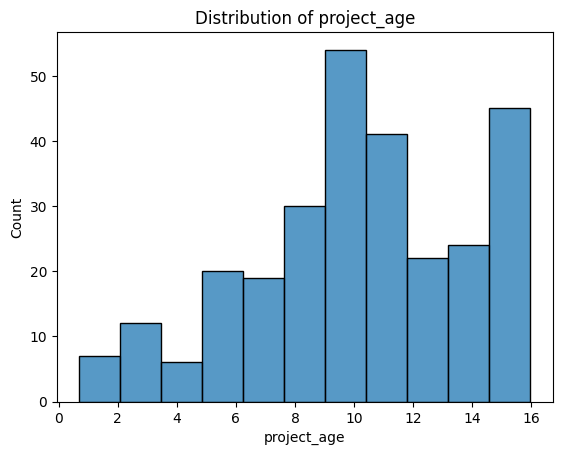

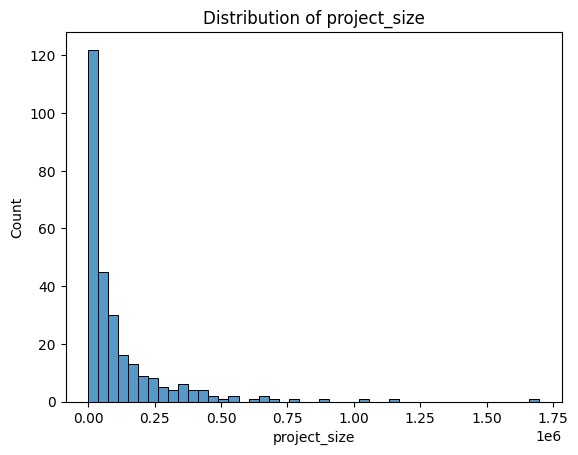

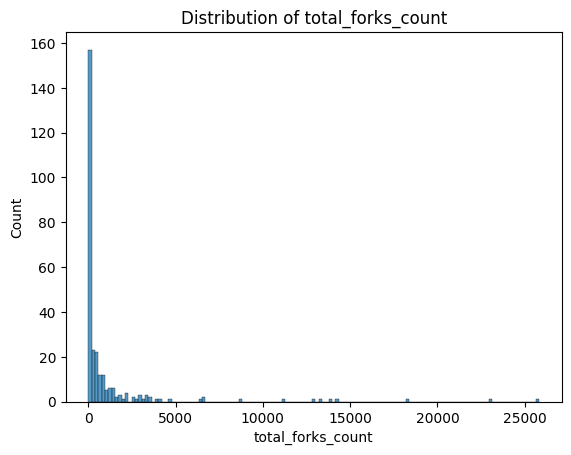

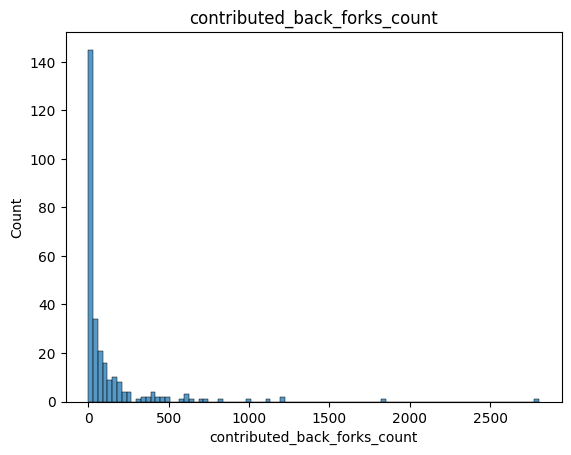

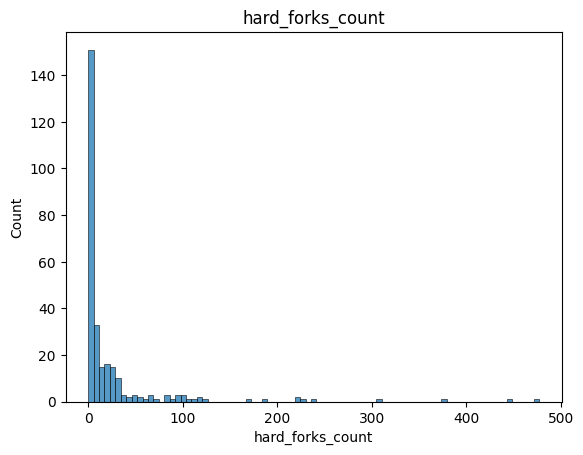

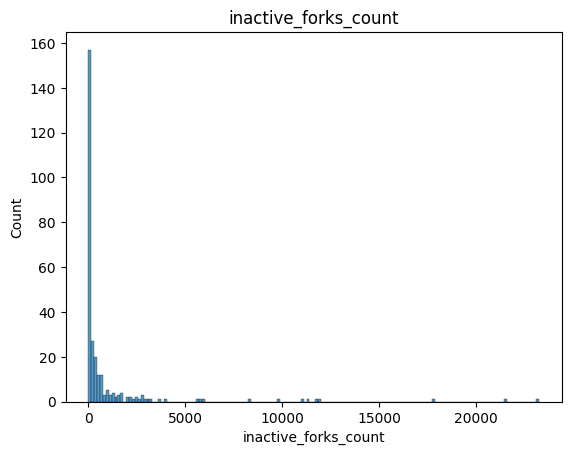

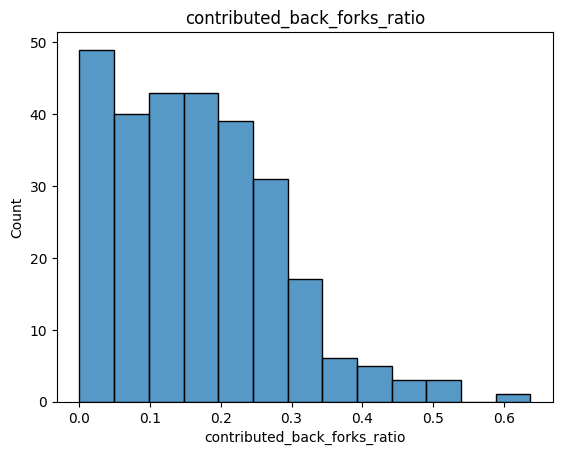

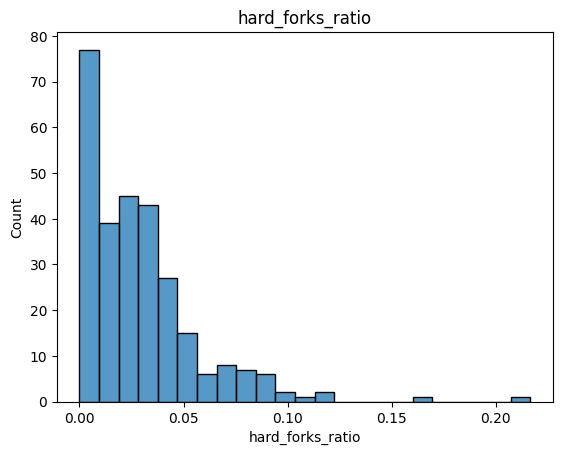

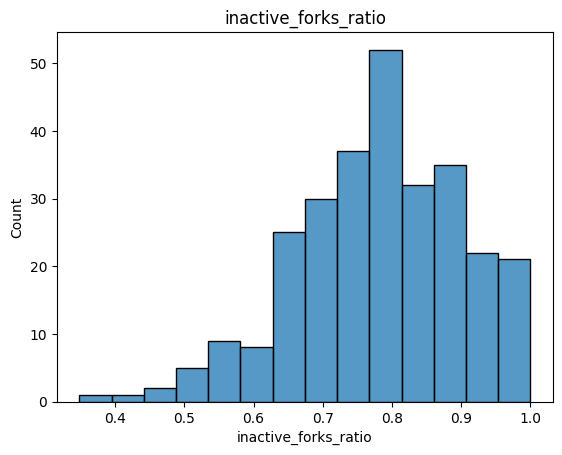

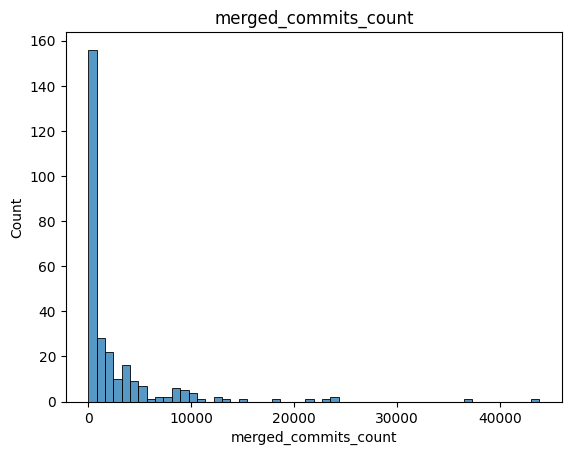

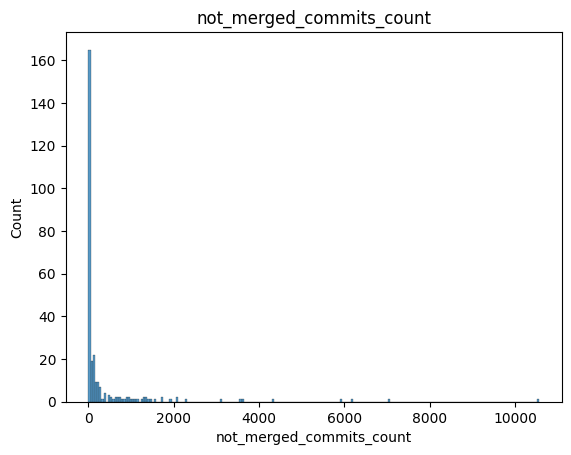

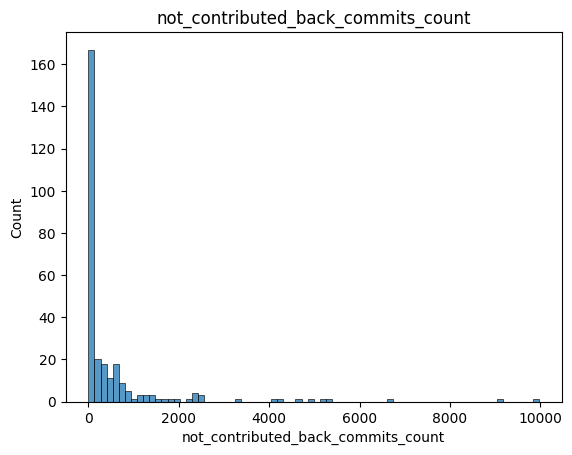

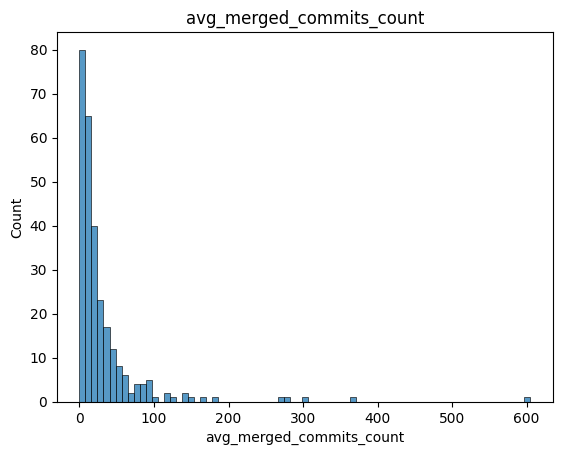

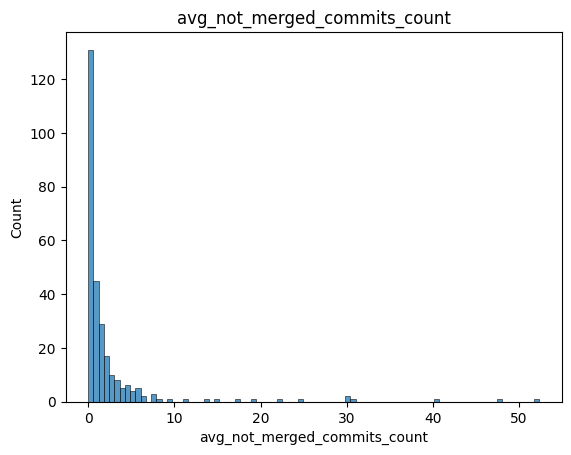

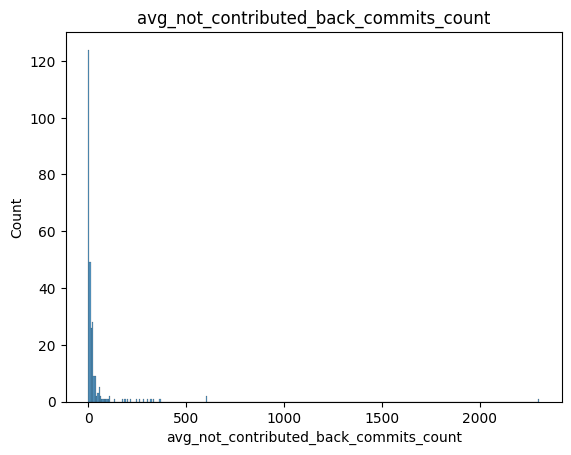

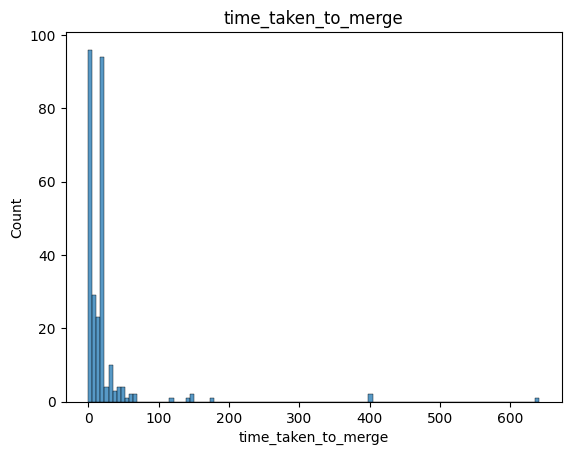

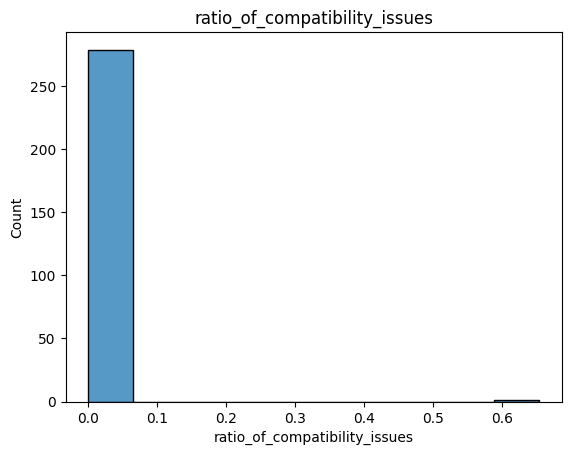

In [49]:
#Check for normality
sns.histplot(df['project_age'])
plt.title("Distribution of project_age")
plt.show()

sns.histplot(df['project_size'])
plt.title("Distribution of project_size")
plt.show()

sns.histplot(df['total_forks_count'])
plt.title("Distribution of total_forks_count")
plt.show()

sns.histplot(df['contributed_back_forks_count'])
plt.title("contributed_back_forks_count")
plt.show()

sns.histplot(df['hard_forks_count'])
plt.title("hard_forks_count")
plt.show()

sns.histplot(df['inactive_forks_count'])
plt.title("inactive_forks_count")
plt.show()

sns.histplot(df['contributed_back_forks_ratio'])
plt.title("contributed_back_forks_ratio")
plt.show()

sns.histplot(df['hard_forks_ratio'])
plt.title("hard_forks_ratio")
plt.show()

sns.histplot(df['inactive_forks_ratio'])
plt.title("inactive_forks_ratio")
plt.show()

sns.histplot(df['merged_commits_count'])
plt.title("merged_commits_count")
plt.show()

sns.histplot(df['not_merged_commits_count'])
plt.title("not_merged_commits_count")
plt.show()

sns.histplot(df['not_contributed_back_commits_count'])
plt.title("not_contributed_back_commits_count")
plt.show()

sns.histplot(df['avg_merged_commits_count'])
plt.title("avg_merged_commits_count")
plt.show()

sns.histplot(df['avg_not_merged_commits_count'])
plt.title("avg_not_merged_commits_count")
plt.show()

sns.histplot(df['avg_not_contributed_back_commits_count'])
plt.title("avg_not_contributed_back_commits_count")
plt.show()

sns.histplot(df['time_taken_to_merge'])
plt.title("time_taken_to_merge")
plt.show()

sns.histplot(df['ratio_of_compatibility_issues'])
plt.title("ratio_of_compatibility_issues")
plt.show()

In [50]:
#log the data to ensure a normal distribution
columns_to_exclude = ["repo_id", "repo_owner", "repo_name", "is_sustaining"]#"inactive_forks_count"

df_excluded = df[columns_to_exclude]

df_logged = df.drop(columns=columns_to_exclude)

df_logged = df_logged.apply(lambda x: np.log1p(x))

df_logged = pd.concat([df_excluded, df_logged], axis=1)

df_logged = df_logged.drop(columns=['repo_id', 'repo_owner', 'repo_name'])

print(df_logged.head())

   is_sustaining  project_age  project_size  total_forks_count  \
0              1     2.489462     13.101485          10.159253   
1              1     2.620491     10.993311          10.049404   
2              1     2.561360     12.410433           9.811263   
3              1     2.390897     12.716123           9.567105   
4              1     2.365753     13.465798           9.533438   

   avg_annual_forks_growth_rate  contributed_back_forks_count  \
0                     -0.096791                      7.523481   
1                      0.018223                      6.570883   
2                     -0.046718                      5.541264   
3                      0.294218                      7.939515   
4                      2.041317                      7.025538   

   contributed_back_forks_ratio  hard_forks_count  hard_forks_ratio  \
0                      0.069179          6.100319          0.017083   
1                      0.030346          5.416100          0.009633   

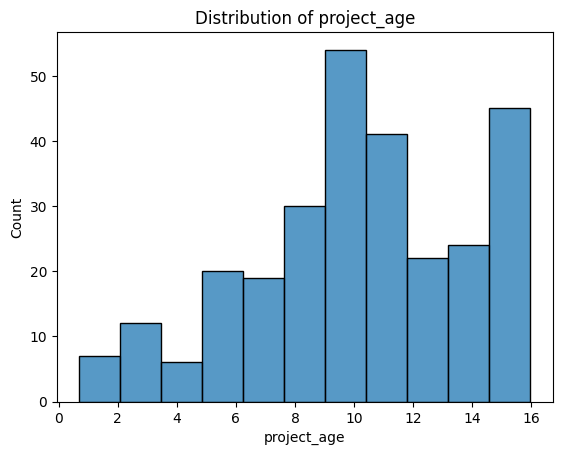

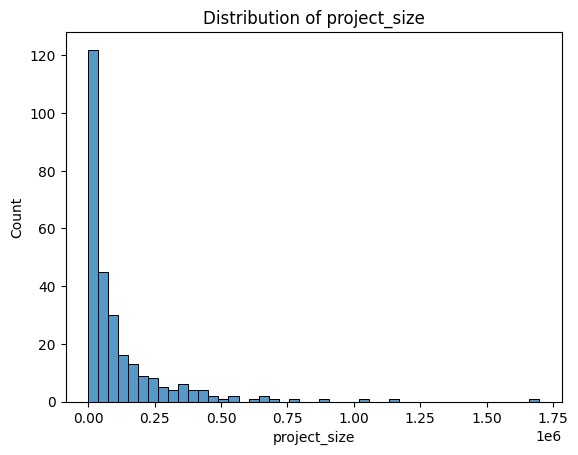

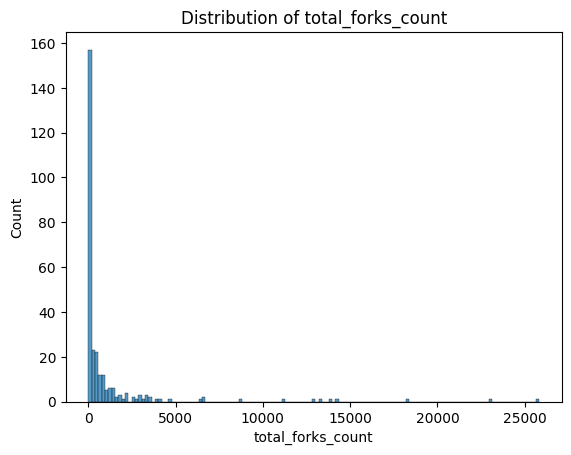

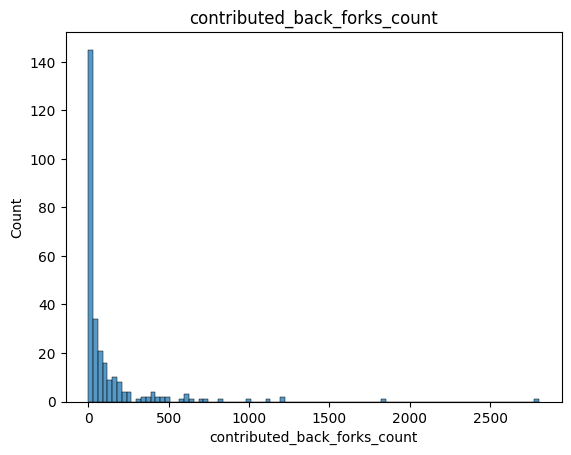

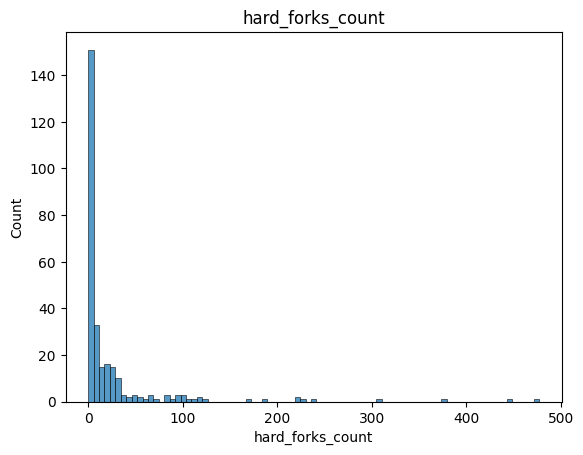

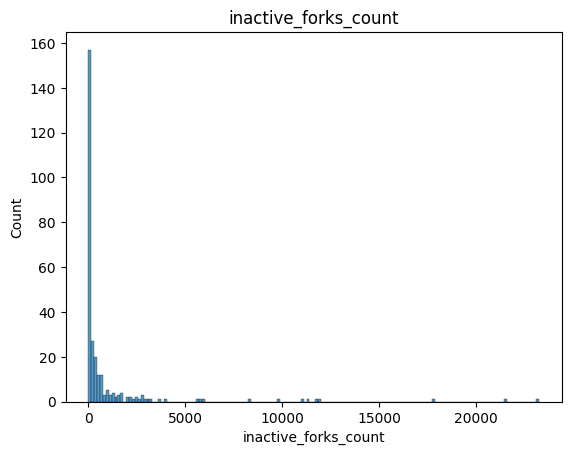

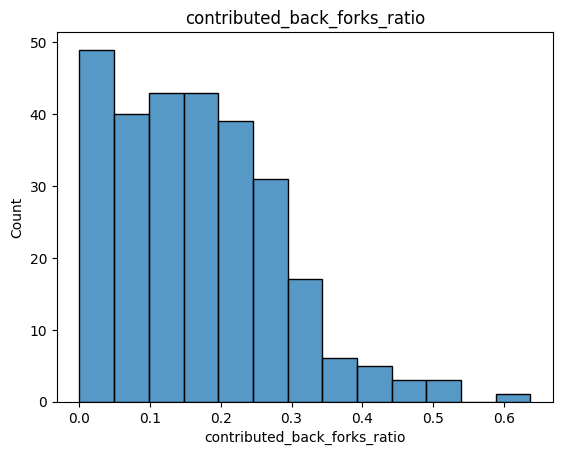

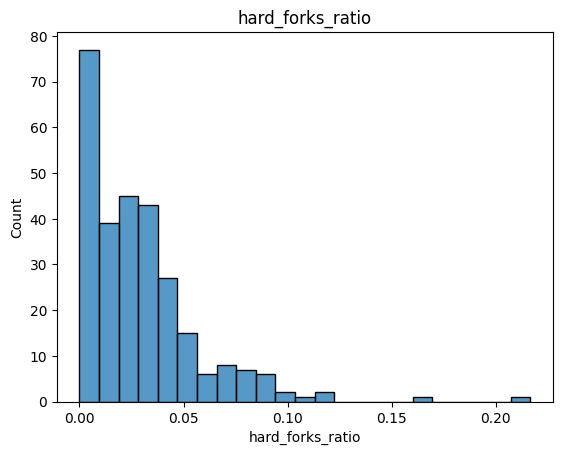

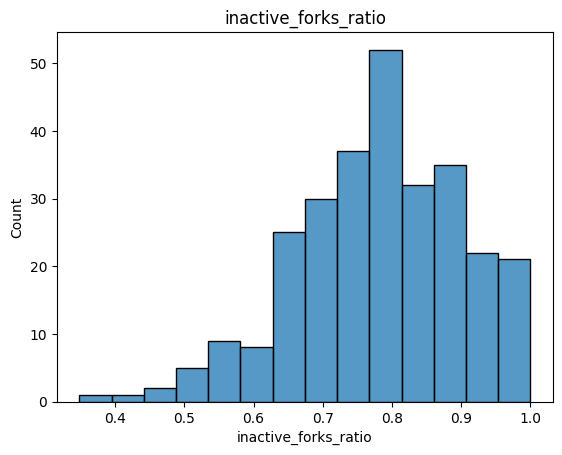

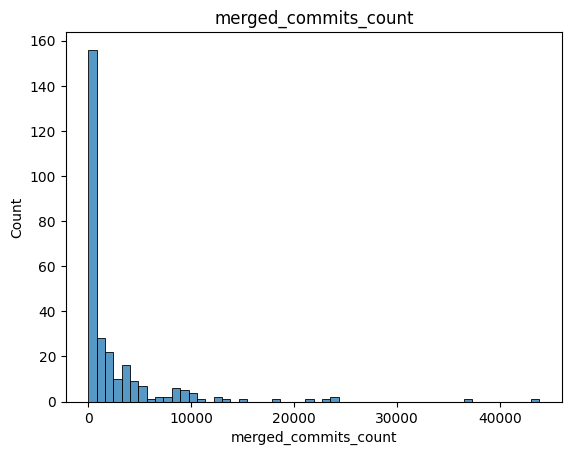

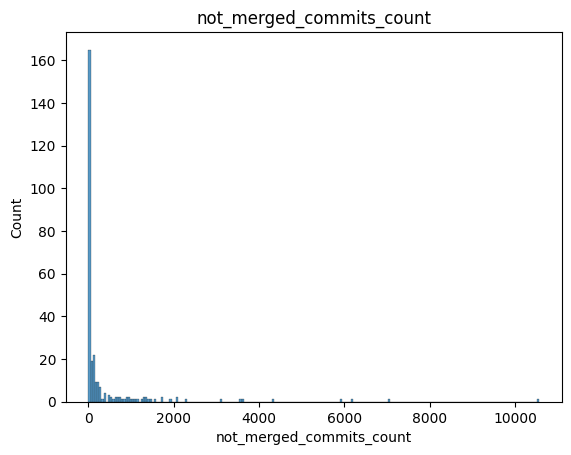

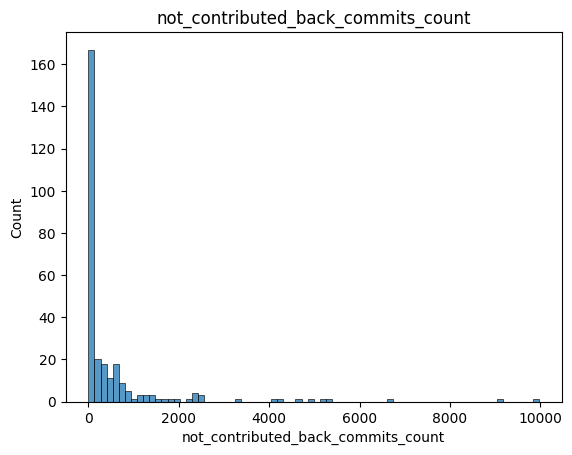

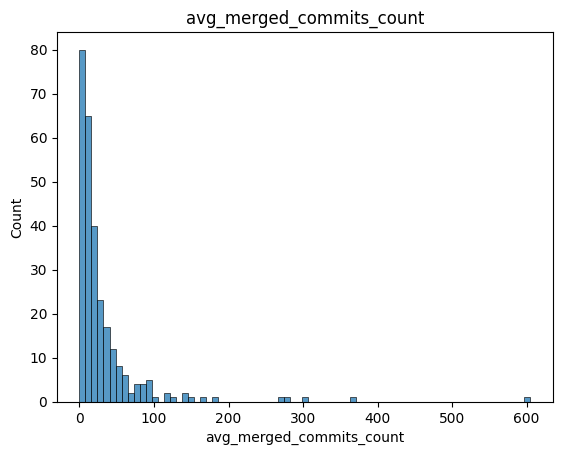

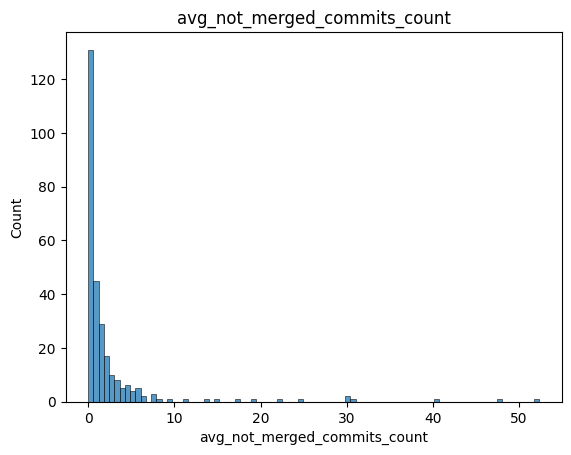

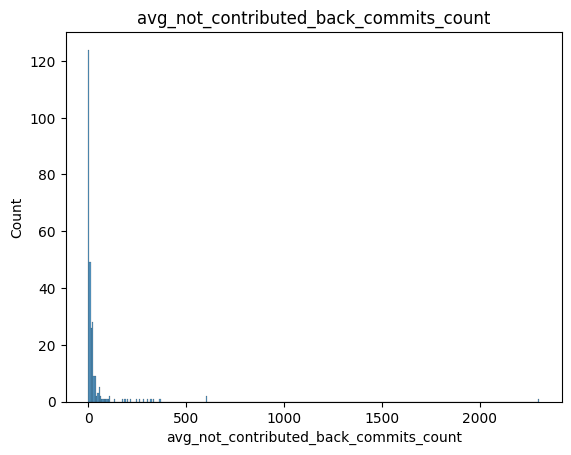

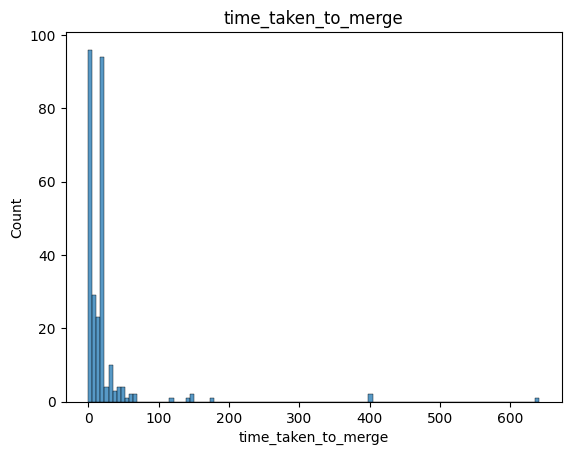

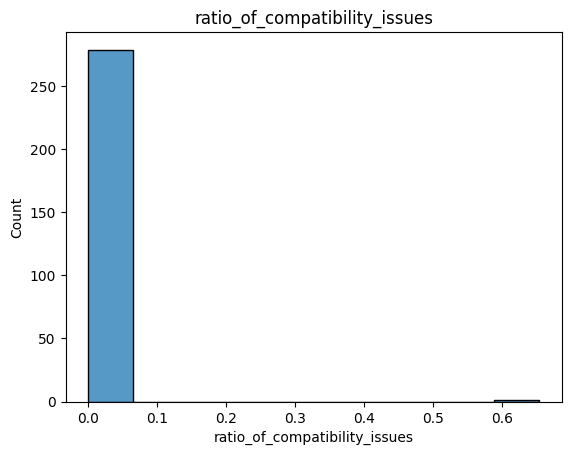

In [51]:
#Check for normality
sns.histplot(df['project_age'])
plt.title("Distribution of project_age")
plt.show()

sns.histplot(df['project_size'])
plt.title("Distribution of project_size")
plt.show()

sns.histplot(df['total_forks_count'])
plt.title("Distribution of total_forks_count")
plt.show()

sns.histplot(df['contributed_back_forks_count'])
plt.title("contributed_back_forks_count")
plt.show()

sns.histplot(df['hard_forks_count'])
plt.title("hard_forks_count")
plt.show()

sns.histplot(df['inactive_forks_count'])
plt.title("inactive_forks_count")
plt.show()

sns.histplot(df['contributed_back_forks_ratio'])
plt.title("contributed_back_forks_ratio")
plt.show()

sns.histplot(df['hard_forks_ratio'])
plt.title("hard_forks_ratio")
plt.show()

sns.histplot(df['inactive_forks_ratio'])
plt.title("inactive_forks_ratio")
plt.show()

sns.histplot(df['merged_commits_count'])
plt.title("merged_commits_count")
plt.show()

sns.histplot(df['not_merged_commits_count'])
plt.title("not_merged_commits_count")
plt.show()

sns.histplot(df['not_contributed_back_commits_count'])
plt.title("not_contributed_back_commits_count")
plt.show()

sns.histplot(df['avg_merged_commits_count'])
plt.title("avg_merged_commits_count")
plt.show()

sns.histplot(df['avg_not_merged_commits_count'])
plt.title("avg_not_merged_commits_count")
plt.show()

sns.histplot(df['avg_not_contributed_back_commits_count'])
plt.title("avg_not_contributed_back_commits_count")
plt.show()

sns.histplot(df['time_taken_to_merge'])
plt.title("time_taken_to_merge")
plt.show()

sns.histplot(df['ratio_of_compatibility_issues'])
plt.title("ratio_of_compatibility_issues")
plt.show()

In [52]:
print(df_logged.columns)

Index(['is_sustaining', 'project_age', 'project_size', 'total_forks_count',
       'avg_annual_forks_growth_rate', 'contributed_back_forks_count',
       'contributed_back_forks_ratio', 'hard_forks_count', 'hard_forks_ratio',
       'inactive_forks_count', 'inactive_forks_ratio', 'merged_commits_count',
       'avg_merged_commits_count', 'not_merged_commits_count',
       'avg_not_merged_commits_count', 'not_contributed_back_commits_count',
       'avg_not_contributed_back_commits_count',
       'avg_annual_merged_commits_growth_rate',
       'avg_annual_not_merged_commits_growth_rate',
       'avg_annual_not_contributed_back_commits_growth_rate',
       'time_taken_to_merge', 'ratio_of_compatibility_issues'],
      dtype='object')


In [53]:
#Do a pearson's correlation analysis and print the results
from scipy.stats import pearsonr

correlation_results = []

for col in df_logged.columns:
        if col != "is_sustaining":
            corr, p_value = pearsonr(df_logged[col], df_logged["is_sustaining"])
            correlation_results.append((col, "is_sustaining", corr, p_value))

for col1, col2, corr, p_value in correlation_results:
    print(f"Correlation between {col1} and {col2}: {corr}, p-value: {p_value}")

Correlation between project_age and is_sustaining: -0.1914326967611274, p-value: 0.0012874103151331293
Correlation between project_size and is_sustaining: 0.37726252202952326, p-value: 6.694385416739673e-11
Correlation between total_forks_count and is_sustaining: 0.5605558939829995, p-value: 1.4355531575174614e-24
Correlation between avg_annual_forks_growth_rate and is_sustaining: 0.4820411424899819, p-value: 1.0667895443714816e-17
Correlation between contributed_back_forks_count and is_sustaining: 0.573627139790281, p-value: 6.728110148537309e-26
Correlation between contributed_back_forks_ratio and is_sustaining: 0.21371370674119192, p-value: 0.0003159998822374281
Correlation between hard_forks_count and is_sustaining: 0.5571697970218847, p-value: 3.1033810917606053e-24
Correlation between hard_forks_ratio and is_sustaining: 0.24068528898257513, p-value: 4.713459889716393e-05
Correlation between inactive_forks_count and is_sustaining: 0.5422809285089194, p-value: 8.310791907082586e-23

In [54]:
#exclude features with a correlation lower than 0.2
df_logged_CDA = df_logged.drop(columns = ["contributed_back_forks_count", "hard_forks_count", "inactive_forks_count", "merged_commits_count", "not_merged_commits_count", "not_contributed_back_commits_count"])
print(df_logged_CDA)

     is_sustaining  project_age  project_size  total_forks_count  \
0                1     2.489462     13.101485          10.159253   
1                1     2.620491     10.993311          10.049404   
2                1     2.561360     12.410433           9.811263   
3                1     2.390897     12.716123           9.567105   
4                1     2.365753     13.465798           9.533438   
..             ...          ...           ...                ...   
275              0     2.664561      8.830104           1.609438   
276              0     2.747095      8.050384           1.945910   
277              0     2.747095      6.011267           1.609438   
278              0     1.965291      7.404888           1.386294   
279              0     1.965291     11.009075           1.386294   

     avg_annual_forks_growth_rate  contributed_back_forks_ratio  \
0                       -0.096791                      0.069179   
1                        0.018223                

In [55]:
# Import model packages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from rfpimp import *
from rfpimp import *
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [56]:
# Create X and y data for training
df = df_logged_CDA

X = df.drop(columns=['is_sustaining'])
y = df['is_sustaining']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

SVM Accuracy: 0.8571428571428571
SVM F1-Score: 0.8888888888888888
SVM ROC-AUC: 0.8538011695906433


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


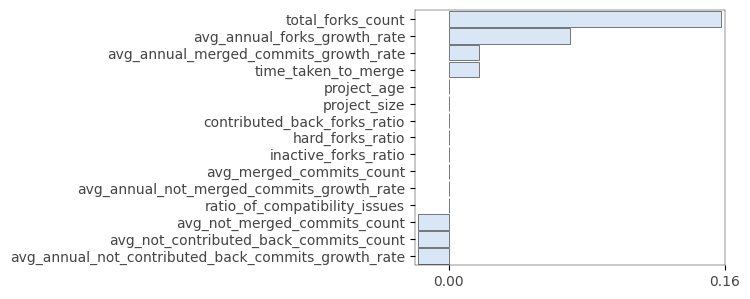

In [57]:
# Train SVM model

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy}")
print(f"SVM F1-Score: {f1_svm}")

y_probabilities = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"SVM ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(svm_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

Random Forest Accuracy: 0.8928571428571429
Random Forest F1-Score: 0.918918918918919
Random Forest ROC-AUC: 0.9122807017543859


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


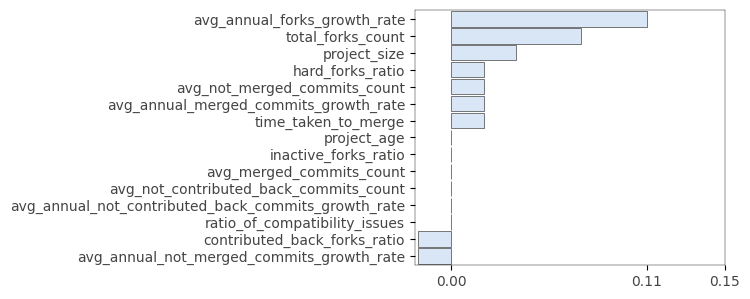

In [58]:
# Train Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1-Score: {f1_rf}")

y_probabilities = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"Random Forest ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(rf_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

XGBoost Accuracy: 0.8928571428571429
XGBoost F1-Score: 0.918918918918919
XGBoost ROC-AUC: 0.8830409356725146


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


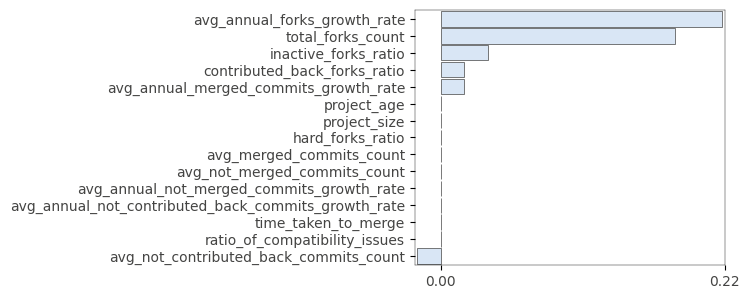

In [59]:
# Train XGBoost model

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost F1-Score: {f1_xgb}")

y_probabilities = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"XGBoost ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(xgb_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

In [60]:
#exclude features with a correlation lower than 0.2
df_logged_CDA_2 = df_logged_CDA.drop(columns = ["inactive_forks_ratio", "project_age", "project_size", "time_taken_to_merge", "ratio_of_compatibility_issues"])
print(df_logged_CDA_2)

     is_sustaining  total_forks_count  avg_annual_forks_growth_rate  \
0                1          10.159253                     -0.096791   
1                1          10.049404                      0.018223   
2                1           9.811263                     -0.046718   
3                1           9.567105                      0.294218   
4                1           9.533438                      2.041317   
..             ...                ...                           ...   
275              0           1.609438                     -0.693147   
276              0           1.945910                     -0.405465   
277              0           1.609438                     -0.693147   
278              0           1.386294                     -0.336472   
279              0           1.386294                     -0.336472   

     contributed_back_forks_ratio  hard_forks_ratio  avg_merged_commits_count  \
0                        0.069179          0.017083               

In [61]:
# Create X and y data for training
df = df_logged_CDA_2

X = df.drop(columns=['is_sustaining'])
y = df['is_sustaining']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

SVM Accuracy: 0.8571428571428571
SVM F1-Score: 0.8888888888888888
SVM ROC-AUC: 0.8567251461988304


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


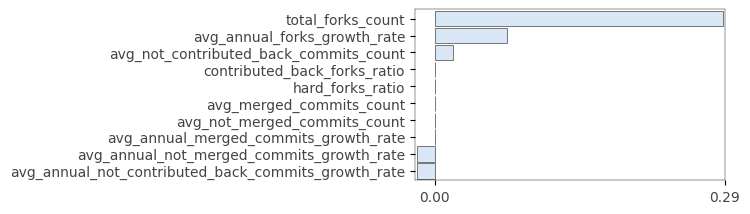

In [62]:
# Train SVM model

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy}")
print(f"SVM F1-Score: {f1_svm}")

y_probabilities = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"SVM ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(svm_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

Random Forest Accuracy: 0.9107142857142857
Random Forest F1-Score: 0.9315068493150684
Random Forest ROC-AUC: 0.898391812865497


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


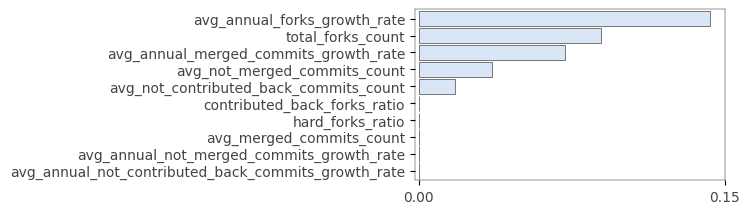

In [63]:
# Train Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1-Score: {f1_rf}")

y_probabilities = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"Random Forest ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(rf_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

XGBoost Accuracy: 0.8928571428571429
XGBoost F1-Score: 0.918918918918919
XGBoost ROC-AUC: 0.8961988304093568


/Users/helen/Documents/02_Course/ECS260-Software Engineering/Project/myenv/lib/python3.11/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


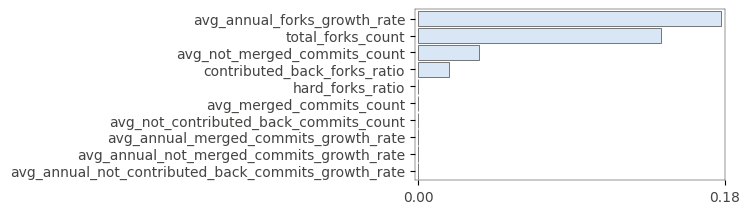

In [64]:
# Train XGBoost model

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost F1-Score: {f1_xgb}")

y_probabilities = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probabilities)
print(f"XGBoost ROC-AUC: {roc_auc}")

# Measure feature importance using permutation importances
imp = importances(xgb_model, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()